In [16]:
import sys, os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" 
import avstack
import avapi
from copy import copy, deepcopy
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

%matplotlib inline

data_dir_kitti_obj = '/data/spencer/KITTI/object'
data_dir_kitti_raw = '/data/spencer/KITTI/raw'
data_dir_nuscenes = '/data/spencer/nuScenes'
data_dir_carla = '/data/spencer/CARLA/object_test'
data_dir_carla_infra = '/data/spencer/CARLA/object_infrastructure'

KSM = avapi.kitti.KittiScenesManager(data_dir_kitti_obj, data_dir_kitti_raw, convert_raw=False)
NSM = avapi.nuscenes.nuScenesManager(data_dir_nuscenes, split='v1.0-mini')
CSM = avapi.carla.CarlaScenesManager(data_dir_carla_infra, verbose=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


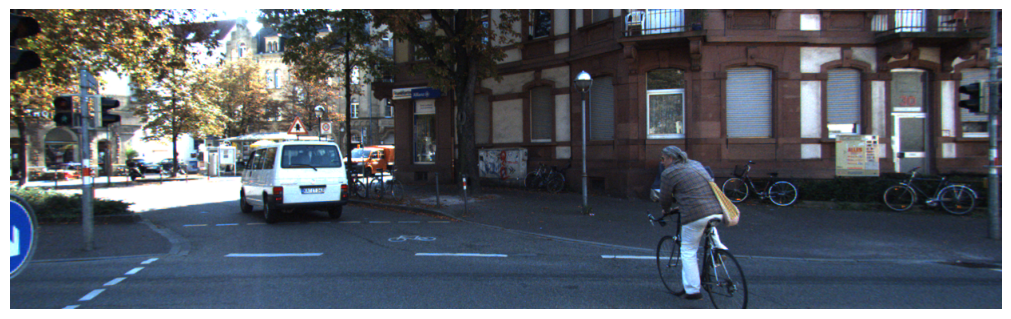

In [20]:
KS = KSM.get_scene_dataset_by_index(2)
img = KS.get_image(10)
img.view()

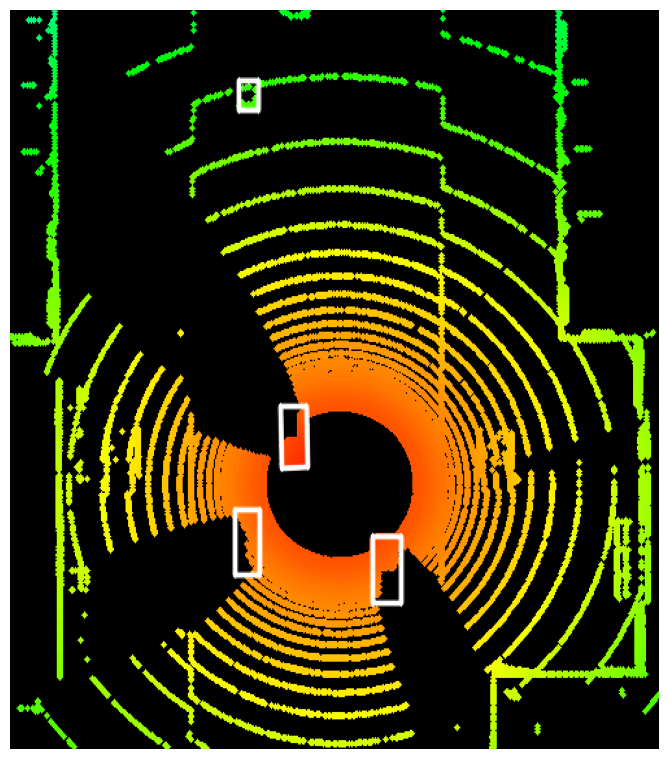

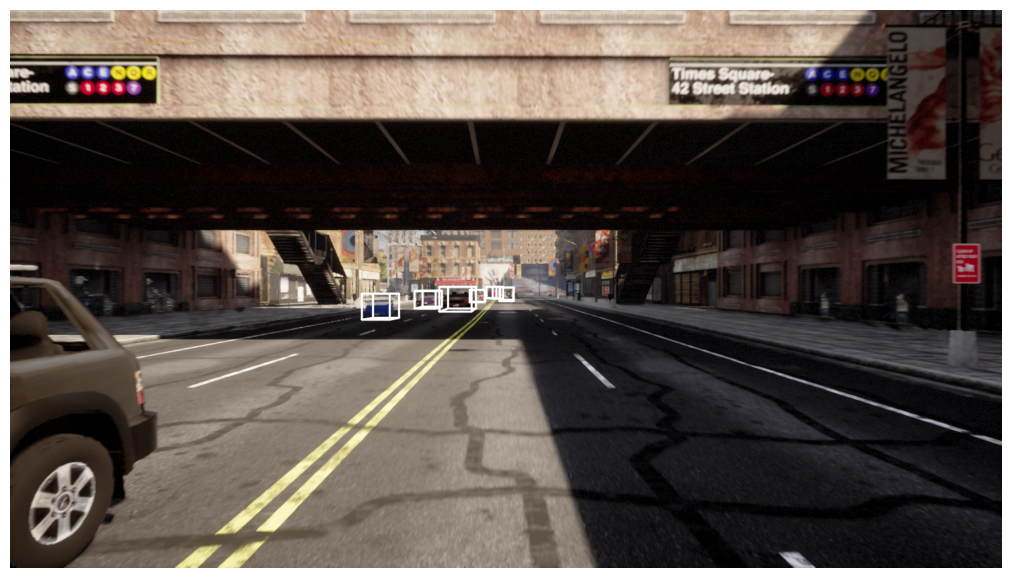

In [24]:
frame = 400
scene_index = 2

SM = CSM
SD = SM.get_scene_dataset_by_index(scene_index)
img = SD.get_image(frame, sensor='main_camera')
pc = SD.get_lidar(frame, sensor='main_lidar', filter_front=False)
objs = SD.get_objects(frame, sensor='main_lidar', whitelist_types='all')


# get colors
extent = [[-20,36], [-25,25], [-5, 10]]
avapi.visualize.show_lidar_bev_with_boxes(pc, [obj.box for obj in objs], extent=extent, box_colors='white', flipx=True)
avapi.visualize.show_image_with_boxes(img, objs, inline=True, box_colors='white')

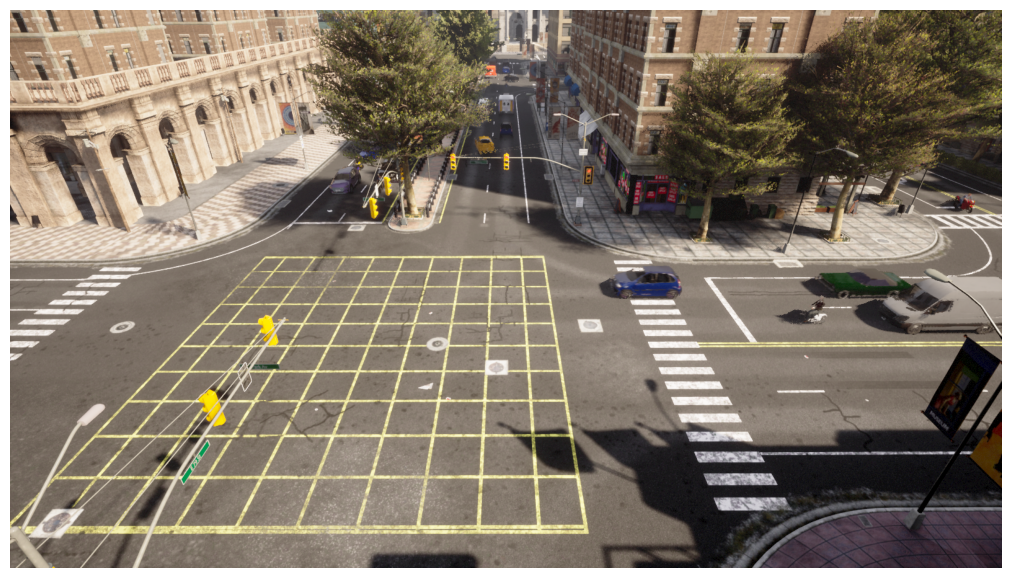

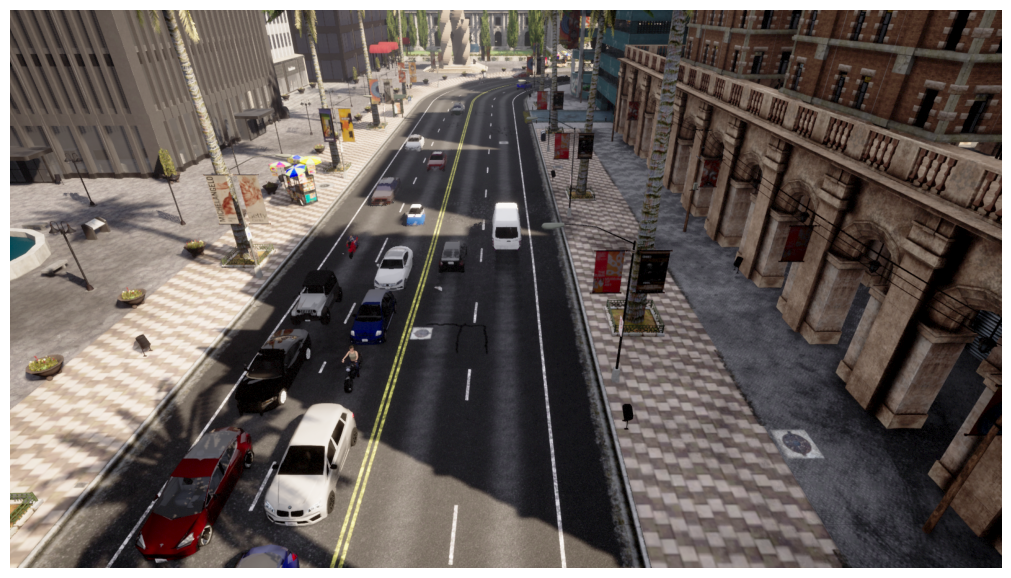

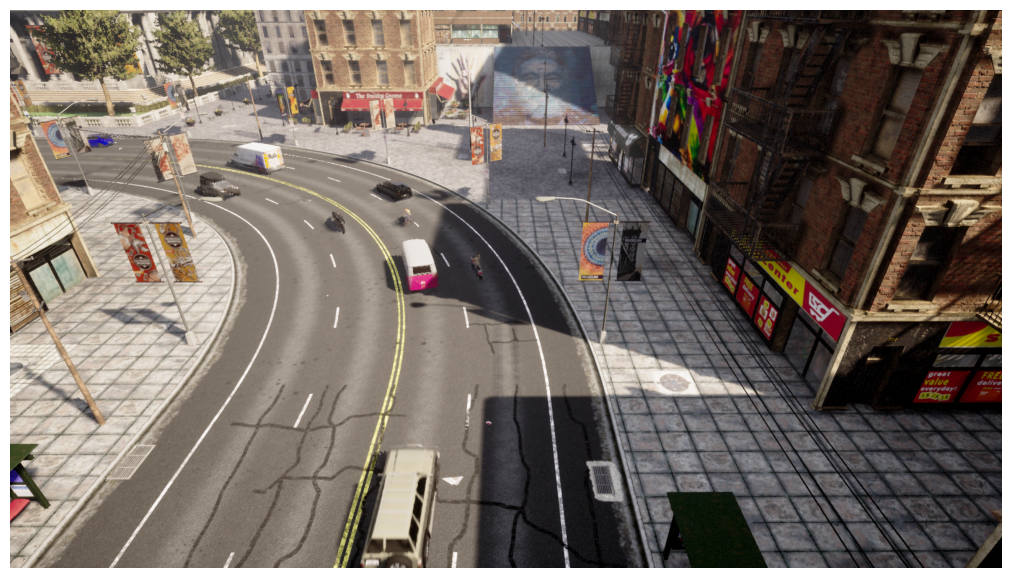

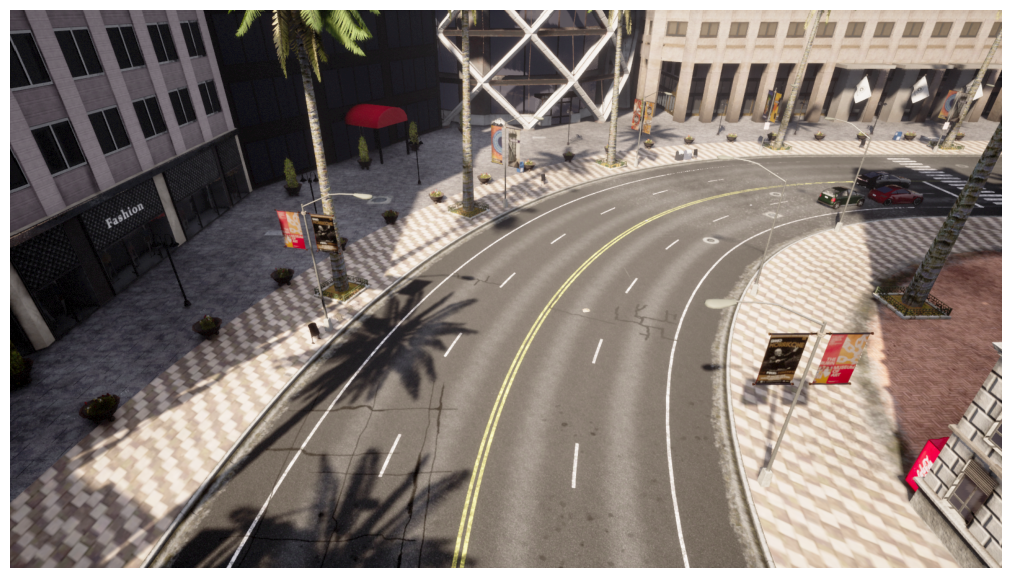

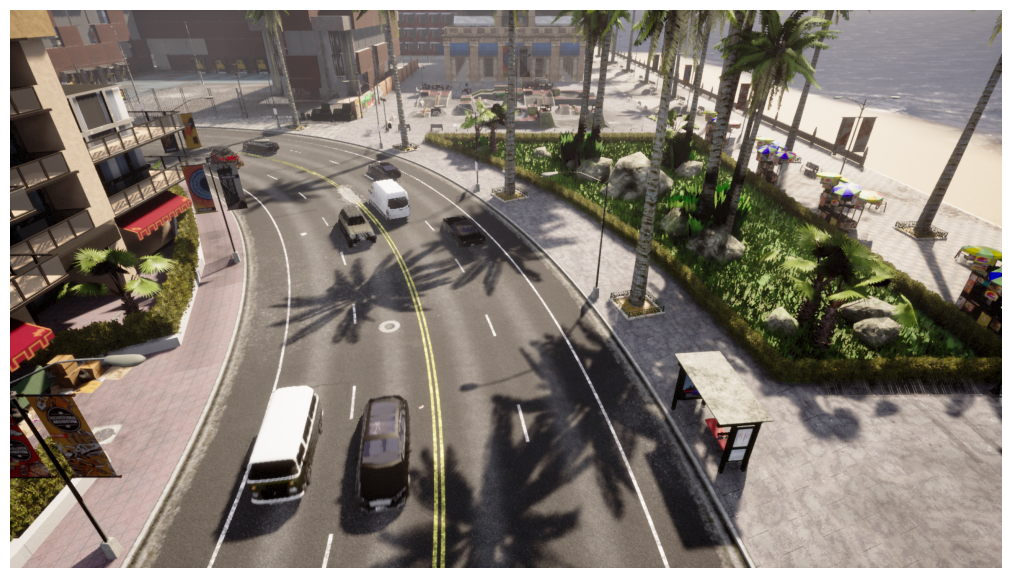

In [26]:
for cam_inf in ['CAM_INFRASTRUCTURE_00{}'.format(i) for i in range(1,6)]:
    img = SD.get_image(frame, sensor=cam_inf)
    objs_2d = [obj.box.project_to_2d_bbox(img.calibration) for obj in SD.get_objects(frame, sensor=cam_inf)]
    avapi.visualize.show_image_with_boxes(img, [], inline=True, box_colors='white')